# Regresion Líneal sencilla con Stats

## Relaciones lineales

Armemos una relación entre Celsius y Farenheit

In [2]:
c = lambda f: 5/9*(f-32 )

Armemos una comprensión de lista con esta función para todas las temeperaturas del 0 al 100 de 10 en 10

In [5]:
relacion_temperaturas = [(f,c(f))for f in range(0,101,10)]

In [6]:
relacion_temperaturas

[(0, -17.77777777777778),
 (10, -12.222222222222223),
 (20, -6.666666666666667),
 (30, -1.1111111111111112),
 (40, 4.444444444444445),
 (50, 10.0),
 (60, 15.555555555555557),
 (70, 21.11111111111111),
 (80, 26.666666666666668),
 (90, 32.22222222222222),
 (100, 37.77777777777778)]

Importa Pandas

In [7]:
import pandas as pd

Creamos un DataFrame con las listas

In [9]:
temps_df = pd.DataFrame(relacion_temperaturas, columns =["Farenheit","Celcius"])

In [10]:
temps_df

,Farenheit,Celcius
0,0,-17.777778
1,10,-12.222222
2,20,-6.666667
3,30,-1.111111
4,40,4.444444
5,50,10.000000
6,60,15.555556
7,70,21.111111
8,80,26.666667
9,90,32.222222


Arma una gráfica que muestre esta relación

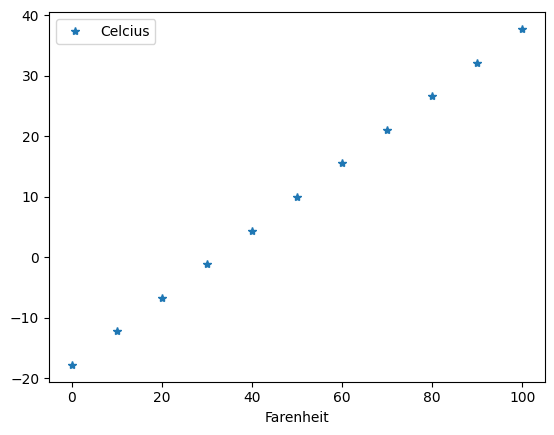

In [14]:
axes = temps_df.plot(x="Farenheit",y="Celcius",style="*")

Ponle etiquetas

y = mx + b # Formato general de formula de la regresión lineal

y = variable pendiente(variabe que controla x)
x = variable independiente (variable que controlas)
m = pendiente de la recta 
    -m>0: la recta sube(creciente)
    -m=0: la recta es horizontal
    -m<0: la recta baja(descendente)
b= interseccion #Es el punto donde la recta cruza sel eje vertical (y)

## Regresión lineal con King_county

Carga los datos de King county a un dataframe

In [16]:
kd_df=pd.read_csv("kc_house_data.csv")

Veamos el Head

In [18]:
kd_df.head(5)

,sqft,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0


Veamos el Tail

In [21]:
kd_df.tail(5)

,AreaFt,PrecioVenta
21608,1530,360000.0
21609,2310,400000.0
21610,1020,402101.0
21611,1600,400000.0
21612,1020,325000.0


Vamos cambiando los titulos de columnas

In [20]:
kd_df.columns=["AreaFt","PrecioVenta"]

Ceca tu nuevo head

In [22]:
kd_df.head(5)

,AreaFt,PrecioVenta
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0


Importa stats de scipy

In [24]:
from scipy import stats

Arma un modelo de regresión lineal

In [25]:
reglin = stats.linregress(x=kd_df.AreaFt,y=kd_df.PrecioVenta)

Chea la pendiente

In [26]:
reglin

LinregressResult(slope=np.float64(280.8066899295009), intercept=np.float64(-43867.60153385613), rvalue=np.float64(0.7020437212325276), pvalue=np.float64(0.0), stderr=np.float64(1.9376149902337922), intercept_stderr=np.float64(4405.45544328903))

In [27]:
reglin.slope #Pendiente --> por cada pie^2 // aumenta 280$

np.float64(280.8066899295009)

Checa la intercepción

In [29]:
reglin.intercept #Si hubiera una casa con 0 pies^2, valdría ese valor

np.float64(-43867.60153385613)

PrecioVenta = 280.80*Areaft - 43,867.60

Vamos a predecir el precio de alguna casa

In [31]:
CasaFila_10 = reglin.slope*1890 - reglin.intercept
CasaFila_10

np.float64(574592.2455006129)

Compara con la realidad

In [32]:
reglin

LinregressResult(slope=np.float64(280.8066899295009), intercept=np.float64(-43867.60153385613), rvalue=np.float64(0.7020437212325276), pvalue=np.float64(0.0), stderr=np.float64(1.9376149902337922), intercept_stderr=np.float64(4405.45544328903))

R^2 = r^2(Coheficiente de determinación)
R^2 = 0.70 ^2 = 0.49 = 49% de la variación de y se explica por x

rvalue = 1 # correlación perfecta positiva
rvalue = 0 # no hay relación lineal
rvalue = -1 # correlación perfecta negativa


### Hacer la gráfica

Importa Seaborn

In [36]:
import seaborn as sns

Pon el estilo como Whitegrid

In [37]:
sns.set_style("whitegrid")

Arma una regplot de sns

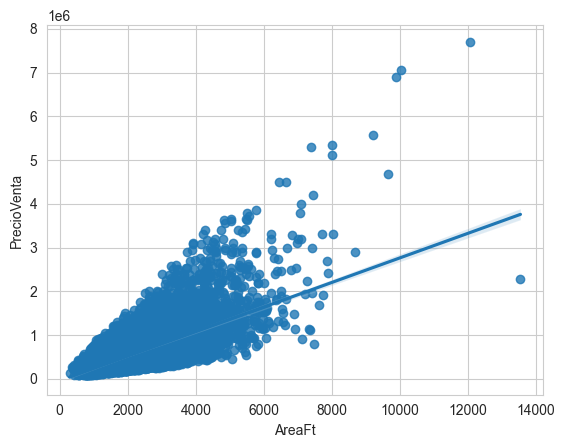

In [ ]:
axes = sns.regplot(x=kd_df.AreaFt,y=kd_df.PrecioVenta,)

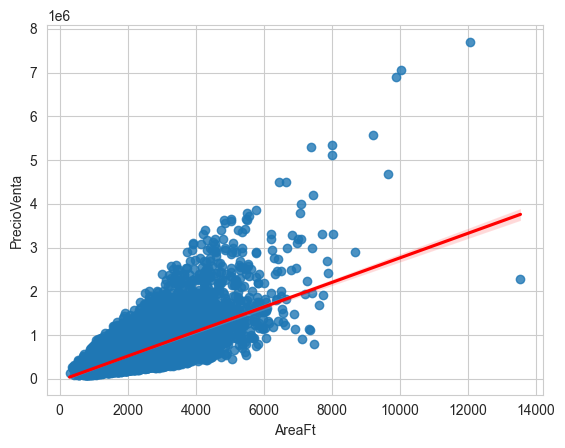

In [40]:
axes = sns.regplot(x=kd_df.AreaFt,y=kd_df.PrecioVenta,data = kd_df, line_kws={"color":"red"})